# How are in-demand skills trending for Data Analysts?

Methodology
1. Aggregate skill counts monthly
2. Re-analyze based on percentage of total jobs
3. Plot the monthly skill demand

In [15]:
# import libraries
import ast
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt
import seaborn as sns

# loading data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# cleanng data
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])

# cleaning the 'job_skills' into a list datatype
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

In [16]:
# we create a new vavriable, copying the original dataframe, where we filter the data anlysts on Argentina

df_DA_ARG = df[(df['job_title'] == 'Data Analyst') & (df['job_country'] == 'Argentina')].copy()

In [17]:
# we're gonna aggregate this on a monthly basis
# so we create a new 'job_posted_month_number' column

df_DA_ARG['job_posted_month_number'] = df_DA_ARG['job_posted_date'].dt.month

In [18]:
# now we can explode the dataframe con the 'job_skills' column, and assing it to a new variable

df_DA_ARG_explode = df_DA_ARG.explode('job_skills')

In [19]:
# now we pivot, aassigning to a new variable

df_DA_ARG_pivot = df_DA_ARG_explode.pivot_table(index='job_posted_month_number', columns='job_skills', aggfunc='size', fill_value=0)

# we need to be able to sort these columns, so we create a new row using '.loc'

df_DA_ARG_pivot.loc['Total'] = df_DA_ARG_pivot.sum()

df_DA_ARG_pivot

job_skills,airflow,alteryx,assembly,aws,azure,bash,bigquery,c++,clickup,css,...,sql,sql server,ssis,tableau,trello,unix,vba,visio,visual basic,word
job_posted_month_number,,,,,,,,,,,,,,,,,,,,,
1,0,0,1,1,0,0,0,0,0,0,...,12,0,1,6,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,7,0,0,6,0,0,0,0,0,0
3,2,0,1,1,0,0,0,0,0,0,...,7,0,1,2,0,0,0,0,0,0
4,0,0,0,2,1,0,1,0,0,0,...,7,0,0,3,0,0,0,0,0,0
5,0,0,0,1,0,0,1,0,0,0,...,8,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,9,0,0,2,0,0,1,0,0,0
7,0,0,0,1,2,0,0,0,0,0,...,15,0,0,12,0,0,0,0,0,1
8,3,3,0,1,3,1,2,0,1,2,...,40,1,0,26,1,1,0,1,1,2
9,0,2,1,5,3,1,0,0,0,0,...,21,0,0,8,0,0,1,2,0,0


In [20]:
# now we need to sort this dataframe
# we wanna filter by the new row 'Total'

df_DA_ARG_pivot[df_DA_ARG_pivot.loc['Total'].sort_values(ascending=False).index]

# we use '.index' beacuase we want the index of each value

job_skills,sql,excel,python,tableau,power bi,r,looker,aws,sas,azure,...,scala,kafka,redis,elasticsearch,ggplot2,php,github,mysql,matlab,neo4j
job_posted_month_number,,,,,,,,,,,,,,,,,,,,,
1,12,4,6,6,2,2,2,1,0,0,...,0,0,0,0,0,0,1,1,0,0
2,7,5,1,6,2,1,2,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,7,4,4,2,3,1,3,1,0,0,...,0,1,0,0,0,0,0,0,0,0
4,7,3,5,3,3,3,1,2,0,1,...,0,0,0,0,0,0,0,0,0,1
5,8,3,4,0,1,0,0,1,4,0,...,0,0,0,0,0,0,0,0,0,0
6,9,6,5,2,4,4,0,0,4,0,...,0,0,0,0,0,0,0,0,0,0
7,15,12,7,12,9,4,1,1,2,2,...,0,0,0,0,0,0,0,0,0,0
8,40,26,24,26,22,13,5,1,4,3,...,0,0,1,1,1,1,0,0,1,0
9,21,20,12,8,13,9,0,5,2,3,...,0,0,0,0,0,0,0,0,0,0


In [21]:
# now we assign it to the original dataframe

df_DA_ARG_pivot = df_DA_ARG_pivot[df_DA_ARG_pivot.loc['Total'].sort_values(ascending=False).index]

In [22]:
# and finally we drop the 'Total' row

df_DA_ARG_pivot = df_DA_ARG_pivot.drop('Total')

df_DA_ARG_pivot

job_skills,sql,excel,python,tableau,power bi,r,looker,aws,sas,azure,...,scala,kafka,redis,elasticsearch,ggplot2,php,github,mysql,matlab,neo4j
job_posted_month_number,,,,,,,,,,,,,,,,,,,,,
1,12,4,6,6,2,2,2,1,0,0,...,0,0,0,0,0,0,1,1,0,0
2,7,5,1,6,2,1,2,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,7,4,4,2,3,1,3,1,0,0,...,0,1,0,0,0,0,0,0,0,0
4,7,3,5,3,3,3,1,2,0,1,...,0,0,0,0,0,0,0,0,0,1
5,8,3,4,0,1,0,0,1,4,0,...,0,0,0,0,0,0,0,0,0,0
6,9,6,5,2,4,4,0,0,4,0,...,0,0,0,0,0,0,0,0,0,0
7,15,12,7,12,9,4,1,1,2,2,...,0,0,0,0,0,0,0,0,0,0
8,40,26,24,26,22,13,5,1,4,3,...,0,0,1,1,1,1,0,0,1,0
9,21,20,12,8,13,9,0,5,2,3,...,0,0,0,0,0,0,0,0,0,0


In [27]:
DA_totals = df_DA_ARG.groupby('job_posted_month_number').size()

In [28]:
# we will use the '.dic' method of pandas to divide all by the total

df_DA_ARG_pivot.div(DA_totals/100, axis=0)

job_skills,sql,excel,python,tableau,power bi,r,looker,aws,sas,azure,...,scala,kafka,redis,elasticsearch,ggplot2,php,github,mysql,matlab,neo4j
job_posted_month_number,,,,,,,,,,,,,,,,,,,,,
1,54.545455,18.181818,27.272727,27.272727,9.090909,9.090909,9.090909,4.545455,0.000000,0.000000,...,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,4.545455,4.545455,0.000000,0.000000
2,53.846154,38.461538,7.692308,46.153846,15.384615,7.692308,15.384615,0.000000,0.000000,0.000000,...,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,70.000000,40.000000,40.000000,20.000000,30.000000,10.000000,30.000000,10.000000,0.000000,0.000000,...,0.000000,10.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,77.777778,33.333333,55.555556,33.333333,33.333333,33.333333,11.111111,22.222222,0.000000,11.111111,...,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,11.111111
5,80.000000,30.000000,40.000000,0.000000,10.000000,0.000000,0.000000,10.000000,40.000000,0.000000,...,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
6,64.285714,42.857143,35.714286,14.285714,28.571429,28.571429,0.000000,0.000000,28.571429,0.000000,...,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
7,60.000000,48.000000,28.000000,48.000000,36.000000,16.000000,4.000000,4.000000,8.000000,8.000000,...,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
8,70.175439,45.614035,42.105263,45.614035,38.596491,22.807018,8.771930,1.754386,7.017544,5.263158,...,0.000000,0.0,1.754386,1.754386,1.754386,1.754386,0.000000,0.000000,1.754386,0.000000
9,56.756757,54.054054,32.432432,21.621622,35.135135,24.324324,0.000000,13.513514,5.405405,8.108108,...,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [29]:
# and assign it to a new variable

df_DA_ARG_percent = df_DA_ARG_pivot.div(DA_totals/100, axis=0)

In [31]:
# now we want to clean up the month, we don't want the number, rather we prefer the name of each month

# changes month number to month name
df_DA_ARG_percent = df_DA_ARG_percent.reset_index()

df_DA_ARG_percent['job_posted_month'] = df_DA_ARG_percent['job_posted_month_number'].apply(lambda x: pd.to_datetime(x, format='%m').strftime('%B'))

df_DA_ARG_percent = df_DA_ARG_percent.set_index('job_posted_month')

df_DA_ARG_percent = df_DA_ARG_percent.drop(columns='job_posted_month_number')

df_DA_ARG_percent

job_skills,index,sql,excel,python,tableau,power bi,r,looker,aws,sas,...,scala,kafka,redis,elasticsearch,ggplot2,php,github,mysql,matlab,neo4j
job_posted_month,,,,,,,,,,,,,,,,,,,,,
January,0,54.545455,18.181818,27.272727,27.272727,9.090909,9.090909,9.090909,4.545455,0.000000,...,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,4.545455,4.545455,0.000000,0.000000
February,1,53.846154,38.461538,7.692308,46.153846,15.384615,7.692308,15.384615,0.000000,0.000000,...,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
March,2,70.000000,40.000000,40.000000,20.000000,30.000000,10.000000,30.000000,10.000000,0.000000,...,0.000000,10.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
April,3,77.777778,33.333333,55.555556,33.333333,33.333333,33.333333,11.111111,22.222222,0.000000,...,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,11.111111
May,4,80.000000,30.000000,40.000000,0.000000,10.000000,0.000000,0.000000,10.000000,40.000000,...,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
June,5,64.285714,42.857143,35.714286,14.285714,28.571429,28.571429,0.000000,0.000000,28.571429,...,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
July,6,60.000000,48.000000,28.000000,48.000000,36.000000,16.000000,4.000000,4.000000,8.000000,...,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
August,7,70.175439,45.614035,42.105263,45.614035,38.596491,22.807018,8.771930,1.754386,7.017544,...,0.000000,0.0,1.754386,1.754386,1.754386,1.754386,0.000000,0.000000,1.754386,0.000000
September,8,56.756757,54.054054,32.432432,21.621622,35.135135,24.324324,0.000000,13.513514,5.405405,...,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


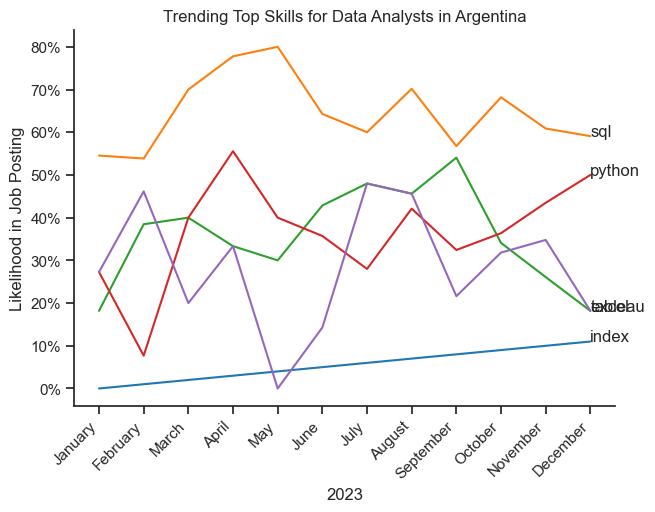

In [46]:
# now we can plot
# specifically, all the rows and the first 5 columns

df_plot = df_DA_ARG_percent.iloc[:, :5]

# we'll use seaborn 

sns.lineplot(data=df_plot, dashes=False, palette='tab10')
sns.set_theme(style='ticks')
sns.despine()

plt.title('Trending Top Skills for Data Analysts in Argentina')
plt.ylabel('Likelihood in Job Posting')
plt.xlabel('2023')
plt.legend().remove()
plt.tight_layout()
plt.xticks(rotation=45, horizontalalignment='right')

from matplotlib.ticker import PercentFormatter
ax = plt.gca()
ax.yaxis.set_major_formatter(PercentFormatter(decimals=0))

for i in range(5):
    plt.text(11, df_plot.iloc[-1, i], df_plot.columns[i])